In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

<h2>Diabetes Binary Classification Dataset</h2>
<h4>Hands-on: Classification with AWS Machine Learning Service</h4>
Input Features:'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age' <br>
Target Feature: 'diabetes_class'<br>
Objective: Predict diabetes_class for given input features<br>

<h4>Data Source: https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes </h4>

In [2]:
columns = ['diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age']

In [3]:
df = pd.read_csv('pima_indians_diabetes_all.csv')

In [4]:
df['diabetes_class'].value_counts()

0    500
1    268
Name: diabetes_class, dtype: int64

In [5]:
df.head()

,preg_count,glucose_concentration,diastolic_bp,triceps_skin_fold_thickness,two_hr_serum_insulin,bmi,diabetes_pedi,age,diabetes_class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.corr()['diabetes_class']

preg_count                     0.221898
glucose_concentration          0.466581
diastolic_bp                   0.065068
triceps_skin_fold_thickness    0.074752
two_hr_serum_insulin           0.130548
bmi                            0.292695
diabetes_pedi                  0.173844
age                            0.238356
diabetes_class                 1.000000
Name: diabetes_class, dtype: float64

In [7]:
# Separate diabetic and normal samples
diabetic = df.diabetes_class == 1
normal = df.diabetes_class == 0

Text(0,0.5,'Samples')

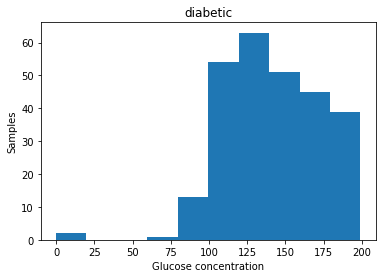

In [8]:
# Diabetic glucose concentration histogram
plt.hist(df[diabetic].glucose_concentration)
plt.title('diabetic')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')

Text(0,0.5,'Samples')

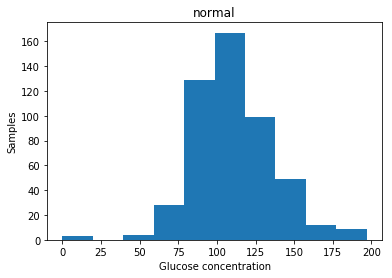

In [9]:
# Normal glucose concentration histogram
plt.hist(df[normal].glucose_concentration)
plt.title('normal')
plt.xlabel('Glucose concentration')
plt.ylabel('Samples')

## Training and Validation Set
### Target Variable as first column followed by input features:
'diabetes_class', 'preg_count', 'glucose_concentration', 'diastolic_bp',
       'triceps_skin_fold_thickness', 'two_hr_serum_insulin', 'bmi',
       'diabetes_pedi', 'age'
### Training, Validation files do not have a column header

In [10]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [11]:
rows = df.shape[0]
train = int(.7 * rows)
test = int(.3 * rows)

In [12]:
rows, train, test

(768, 537, 230)

In [13]:
# Write Training Set
df[:train].to_csv('diabetes_train.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [14]:
# Write Validation Set
df[train:].to_csv('diabetes_validation.csv'
                          ,index=False,index_label='Row',header=False
                          ,columns=columns)

In [15]:
# Write Column List
with open('diabetes_train_column_list.txt','w') as f:
    f.write(','.join(columns))